In this notebook we perform an exploritory data analysis 
on COVID19 cases. The data obtained comes from the John Hopkins University and World-O-Meter

In [1]:
# install covid dataset 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import sys
!pip3 install covid

In [2]:
# import the covid library and fetch data
from covid import Covid
covid = Covid()
covid = Covid(source='worldometers')
covid.get_data()

[{'country': 'North America',
  'confirmed': 31713342,
  'new_cases': 11648,
  'deaths': 688635,
  'recovered': 20770166,
  'active': 10254541,
  'critical': 29175,
  'new_deaths': 782,
  'total_tests': 0,
  'total_tests_per_million': Decimal('0'),
  'total_cases_per_million': Decimal('0'),
  'total_deaths_per_million': Decimal('0'),
  'population': Decimal('0')},
 {'country': 'Asia',
  'confirmed': 23696922,
  'new_cases': 55571,
  'deaths': 381198,
  'recovered': 22201045,
  'active': 1114679,
  'critical': 22618,
  'new_deaths': 753,
  'total_tests': 0,
  'total_tests_per_million': Decimal('0'),
  'total_cases_per_million': Decimal('0'),
  'total_deaths_per_million': Decimal('0'),
  'population': Decimal('0')},
 {'country': 'South America',
  'confirmed': 16482713,
  'new_cases': 4059,
  'deaths': 430369,
  'recovered': 14777651,
  'active': 1274693,
  'critical': 19872,
  'new_deaths': 96,
  'total_tests': 0,
  'total_tests_per_million': Decimal('0'),
  'total_cases_per_million': D

In [3]:
# determine the source of the data
covid.source

'worldometers'

In [4]:
# determine the worldometer covid status country name
covid.get_status_by_country_name("USA")

{'country': 'USA',
 'confirmed': 27704111,
 'new_cases': 3442,
 'deaths': 476553,
 'recovered': 17531152,
 'active': 9696406,
 'critical': 21445,
 'new_deaths': 145,
 'total_tests': 325615135,
 'total_tests_per_million': Decimal('0'),
 'total_cases_per_million': Decimal('83400'),
 'total_deaths_per_million': Decimal('1435'),
 'population': Decimal('332182690')}

In [5]:
# look at the John Hopkins data by country code
covid = Covid(source='john_hopkins')

covid.list_countries()


[{'id': '179', 'name': 'US'},
 {'id': '80', 'name': 'India'},
 {'id': '24', 'name': 'Brazil'},
 {'id': '183', 'name': 'United Kingdom'},
 {'id': '143', 'name': 'Russia'},
 {'id': '63', 'name': 'France'},
 {'id': '163', 'name': 'Spain'},
 {'id': '86', 'name': 'Italy'},
 {'id': '178', 'name': 'Turkey'},
 {'id': '67', 'name': 'Germany'},
 {'id': '38', 'name': 'Colombia'},
 {'id': '7', 'name': 'Argentina'},
 {'id': '115', 'name': 'Mexico'},
 {'id': '139', 'name': 'Poland'},
 {'id': '82', 'name': 'Iran'},
 {'id': '161', 'name': 'South Africa'},
 {'id': '181', 'name': 'Ukraine'},
 {'id': '137', 'name': 'Peru'},
 {'id': '81', 'name': 'Indonesia'},
 {'id': '47', 'name': 'Czechia'},
 {'id': '125', 'name': 'Netherlands'},
 {'id': '33', 'name': 'Canada'},
 {'id': '140', 'name': 'Portugal'},
 {'id': '36', 'name': 'Chile'},
 {'id': '142', 'name': 'Romania'},
 {'id': '17', 'name': 'Belgium'},
 {'id': '85', 'name': 'Israel'},
 {'id': '83', 'name': 'Iraq'},
 {'id': '167', 'name': 'Sweden'},
 {'id': '1

In [6]:
# View the US current information
covid.get_status_by_country_id(179)

{'id': '179',
 'country': 'US',
 'confirmed': 27101604,
 'active': 26636169,
 'deaths': 465435,
 'recovered': None,
 'latitude': 40.0,
 'longitude': -100.0,
 'last_update': 1612887768000}

In [7]:
# show the total active covid cases if covid19
covid.get_total_active_cases()

44758105

In [8]:
# show the total confirmed cases of covid19
covid.get_total_confirmed_cases()

106617679

In [9]:
# show the total number of recovered cases
covid.get_total_recovered()

59529285

In [10]:
# show the total number of deaths associated with covid19
covid.get_total_deaths()

2330065

In [11]:
# convert data into a pandas dataframe 
covid = Covid(source='worldometers')
df = pd.DataFrame(covid.get_data())
df.head()

,country,confirmed,new_cases,deaths,recovered,active,critical,new_deaths,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
0,North America,31713342,11648,688635,20770166,10254541,29175,782,0,0,0,0,0
1,Asia,23696922,55571,381198,22201045,1114679,22618,753,0,0,0,0,0
2,South America,16482713,4059,430369,14777651,1274693,19872,96,0,0,0,0,0
3,Europe,31498947,66785,743676,18148404,12606867,28595,3208,0,0,0,0,0
4,Africa,3705286,3996,95712,3224230,385344,2573,64,0,0,0,0,0


In [40]:
# verify the values are numeric
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

country                     False
confirmed                    True
new_cases                    True
deaths                       True
recovered                    True
active                       True
critical                     True
new_deaths                   True
total_tests                  True
total_tests_per_million      True
total_cases_per_million      True
total_deaths_per_million     True
population                   True
dtype: bool

In [41]:
sorted = df.sort_values(by=['confirmed'], ascending=False)
sorted.head(10)

,country,confirmed,new_cases,deaths,recovered,active,critical,new_deaths,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
7,World,107148359,142065,2340685,79156339,25651335,102838,4903,0,0,13746,300.3,0
0,North America,31713342,11648,688635,20770166,10254541,29175,782,0,0,0,0,0
3,Europe,31498947,66785,743676,18148404,12606867,28595,3208,0,0,0,0,0
8,USA,27704111,3442,476553,17531152,9696406,21445,145,325615135,0,83400,1435,332182690
1,Asia,23696922,55571,381198,22201045,1114679,22618,753,0,0,0,0,0
2,South America,16482713,4059,430369,14777651,1274693,19872,96,0,0,0,0,0
9,India,10854353,6563,155234,10555178,143941,8944,39,201900614,0,7819,112,1388234493
10,Brazil,9550301,0,232248,8447645,870408,8318,0,28600000,0,44737,1088,213477384
11,Russia,3998216,15019,77598,3493886,426732,2300,530,105000000,0,27390,532,145972616
12,UK,3972148,12364,113850,1950886,1907412,3230,1052,78860651,0,58326,1672,68102885


In [42]:
# Extract data for World and Continents to view countries
excluded = sorted[~sorted.country.isin(['Europe', 'South America',
'Asia', 'North America', 'World', 'Africa'])]

In [56]:
# View the top 10 countries
wom_top10 = excluded.head(10)
wom_top10

,country,confirmed,new_cases,deaths,recovered,active,critical,new_deaths,total_tests,total_tests_per_million,total_cases_per_million,total_deaths_per_million,population
8,USA,27704111,3442,476553,17531152,9696406,21445,145,325615135,0,83400,1435,332182690
9,India,10854353,6563,155234,10555178,143941,8944,39,201900614,0,7819,112,1388234493
10,Brazil,9550301,0,232248,8447645,870408,8318,0,28600000,0,44737,1088,213477384
11,Russia,3998216,15019,77598,3493886,426732,2300,530,105000000,0,27390,532,145972616
12,UK,3972148,12364,113850,1950886,1907412,3230,1052,78860651,0,58326,1672,68102885
13,France,3341365,0,79423,233993,3027949,3363,0,46751422,0,51121,1215,65361495
14,Spain,2989085,0,62295,0,0,4732,0,35782465,0,63916,1332,46765820
15,Italy,2644707,0,91580,2133523,419604,2143,0,34506996,0,43781,1516,60407564
16,Turkey,2548195,8636,26998,2437382,83815,1310,98,30893496,0,30018,318,84889277
17,Germany,2298194,1868,62849,2057300,178045,3957,252,40705522,0,27377,749,83947051


In [57]:
# Extract the content into variables 
x = top10.country
y0 = top10.confirmed
y1 = top10.active
y2 = top10.deaths
y3 = top10.recovered

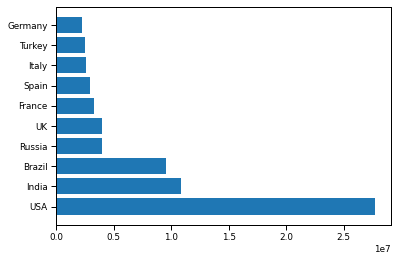

In [32]:
# plot of the top10 confirmed
plt.barh(x, y0, label="Confirmed")
plt.show()

<AxesSubplot:xlabel='country', ylabel='confirmed'>

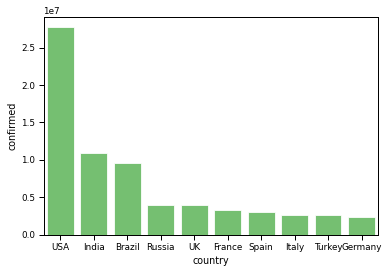

In [58]:
sns.set_context('paper')
sns.barplot(x = 'country', y = 'confirmed', data = wom_top10,
            label = 'Confirmed Cases', color = 'g', edgecolor = 'w')

<AxesSubplot:xlabel='country', ylabel='confirmed'>

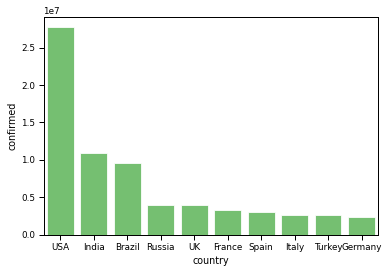

In [59]:
sns.set_context('paper')
sns.barplot(x = 'country', y = 'confirmed', data = wom_top10,
            label = 'Confirmed Cases', color = 'g', edgecolor = 'w')

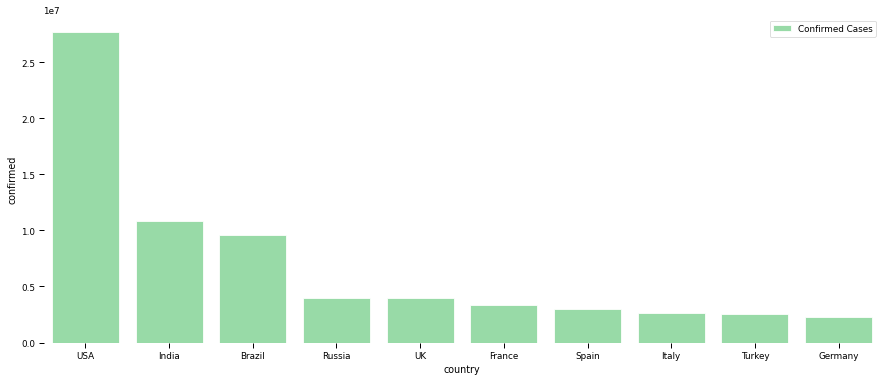

In [60]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(x = 'country', y = 'confirmed', data = wom_top10,
            label = 'Confirmed Cases', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.show()

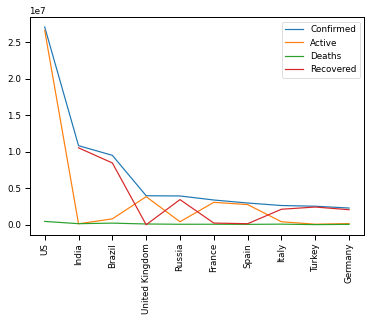

In [61]:
# View multiline graph
plt.plot(x, y0, label='Confirmed')
plt.plot(x, y1, label='Active')
plt.plot(x, y2, label='Deaths')
plt.plot(x, y3, label='Recovered')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()


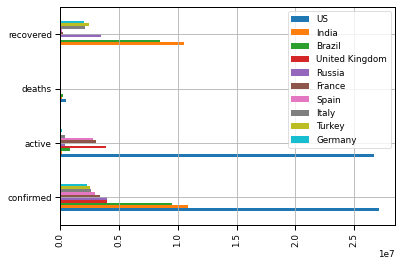

In [62]:
# Multi barcharts covering the data
df2 = pd.DataFrame([y0, y1, y2, y3])
df2.plot.barh();
plt.legend(x, loc='upper right')
plt.xticks(rotation=90)
plt.grid()
plt.show()

View the top 10 countries reported by the World-O-Meter with the lowest numbers

In [82]:
sorted = df.sort_values(by=['confirmed'], ascending=True)
bottom10 = sorted.head(10)

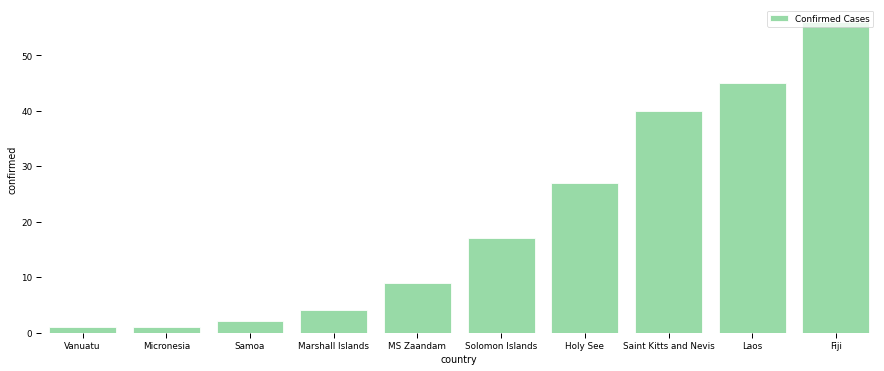

In [83]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (15, 6))
sns.set_color_codes('pastel')
sns.barplot(x = 'country', y = 'confirmed', data = bottom10,
            label = 'Confirmed Cases', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.show()

In [81]:
#View top10 reported by John Hopkins
covid = Covid(source='john_hopkins')
df = pd.DataFrame(covid.get_data())
df.head()

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,179,US,27101604,26636169,465435,NaN,40.000000,-100.00000,1612887768000
1,80,India,10847304,143625,155158,10548521.0,20.593684,78.96288,1612887768000
2,24,Brazil,9524640,814288,231534,8478818.0,-14.235000,-51.92530,1612887768000
3,183,United Kingdom,3983683,3859273,114066,10344.0,55.000000,-3.00000,1612887768000
4,143,Russia,3953970,422041,76347,3455582.0,61.524000,105.31880,1612887768000


Verify that the John Hopkins data shows the same data top counts and bottom counts

In [64]:
# View which columns are numeric
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

id              True
country        False
confirmed       True
active          True
deaths          True
recovered      False
latitude       False
longitude      False
last_update     True
dtype: bool

In [65]:
jh_top10 = df.head(10)
jh_top10

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,179,US,27101604,26636169,465435,NaN,40.000000,-100.000000,1612887768000
1,80,India,10847304,143625,155158,10548521.0,20.593684,78.962880,1612887768000
2,24,Brazil,9524640,814288,231534,8478818.0,-14.235000,-51.925300,1612887768000
3,183,United Kingdom,3983683,3859273,114066,10344.0,55.000000,-3.000000,1612887768000
4,143,Russia,3953970,422041,76347,3455582.0,61.524000,105.318800,1612887768000
5,63,France,3400549,3080553,79572,240200.0,46.227600,2.213700,1612887768000
6,163,Spain,2989085,2776414,62295,150376.0,40.463667,-3.749220,1612887768000
7,86,Italy,2644707,419604,91580,2133523.0,41.871900,12.567400,1612887768000
8,178,Turkey,2548195,83815,26998,2437382.0,38.963700,35.243300,1612887768000
9,67,Germany,2299503,168736,62317,2068450.0,51.165691,10.451526,1612887768000


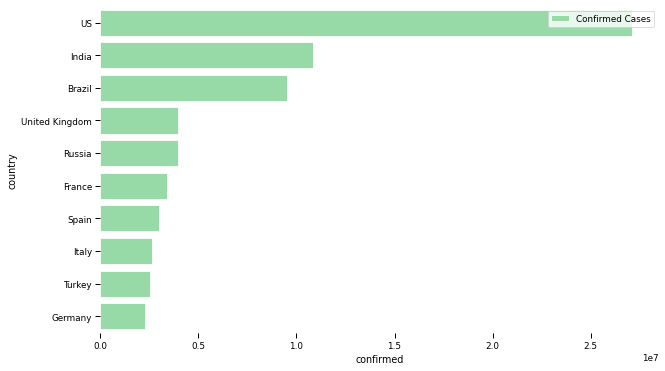

In [70]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (10, 6))
sns.set_color_codes('pastel')
sns.barplot(x = 'confirmed', y = 'country', data = jh_top10,
            label = 'Confirmed Cases', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.show()

In [86]:
# looking at the countires with the lowest top 10 covid cases reported by John Hopkins
sorted1 = df.sort_values(by=['confirmed'], ascending=True)
bottom10 = sorted1.head(10)
bottom10

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
191,186,Vanuatu,1,0,0,1.0,-15.376700,166.959200,1612887768000
190,116,Micronesia,1,0,0,1.0,7.425600,150.550800,1612887768000
189,148,Samoa,2,0,0,2.0,-13.759000,-172.104600,1612887768000
188,112,Marshall Islands,4,0,0,4.0,7.131500,171.184500,1612887768000
187,105,MS Zaandam,9,0,2,7.0,NaN,NaN,1612887768000
186,159,Solomon Islands,17,7,0,10.0,-9.645700,160.156200,1612887768000
185,76,Holy See,27,12,0,15.0,41.902900,12.453400,1612887768000
184,145,Saint Kitts and Nevis,40,4,0,36.0,17.357822,-62.782998,1612887768000
183,96,Laos,45,4,0,41.0,19.856270,102.495496,1612887768000
182,61,Fiji,56,1,2,53.0,-17.713400,178.065000,1612887768000


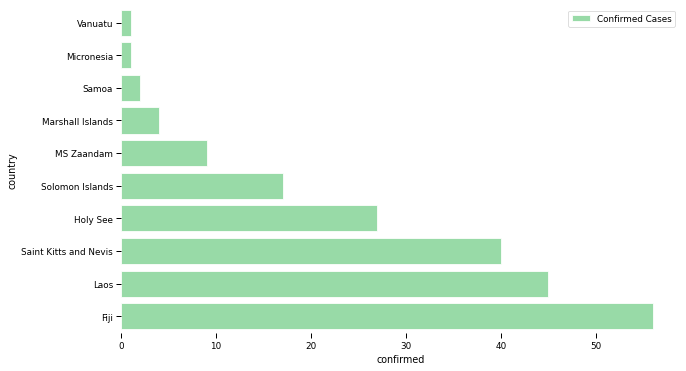

In [87]:
sns.set_context('paper')

f, ax = plt.subplots(figsize = (10, 6))
sns.set_color_codes('pastel')
sns.barplot(x = 'confirmed', y = 'country', data = bottom10,
            label = 'Confirmed Cases', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.show()